In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers
import tensorflow_hub as hub

In [ ]:
way_in_model =  tf.keras.Sequential([
    hub.KerasLayer("https://hub.tensorflow.google.cn/tensorflow/efficientnet/b0/feature-vector/1",
                   trainable=False)
])
way_in_model.build([None, 224, 224, 3]) 

In [ ]:
def my_model(input_size = (448,224,3)):
    inputs = Input(shape=input_size)
    #Divide into 2 ways
    a=inputs[:,0:224,:,:]
    b=inputs[:,224:448,:,:]
    
    #way1
    w1=way_in_model(a)
    w1=Dropout(0.5)(w1)
    w1=Flatten(trainable=False)(w1)
    
    #way2
    w2=way_in_model(b)
    w2=Dropout(0.5)(w2)
    w2=Flatten(trainable=False)(w2)
    
    #mearge
    m=concatenate([w1,w2], axis = 1)
    print(m.shape)
    m=Dense(256, activation='relu',trainable=True)(m)
    m=Dense(2, activation='softmax',trainable=True,kernel_regularizer=regularizers.l2(0.01))(m)
    
    print(a.shape,w1.shape,m.shape)
    model = Model(inputs,m)
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
a=my_model()

(None, 2560)
(None, 224, 224, 3) (None, 1280) (None, 2)


In [ ]:
a.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 448, 224, 3) 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 1280)         2257984     tf.__operators__.getitem[0][0]   
                                                                 tf.__operators__.getitem_1[

In [ ]:
X.shape

(4500, 448, 224, 3)

In [ ]:
history = a.fit(X, y, epochs=20,batch_size=32,validation_split=0.2, verbose=1)

Epoch 1/20
113/113 [==============================] - 53s 144ms/step - loss: 0.9756 - accuracy: 0.4984 - val_loss: 0.7213 - val_accuracy: 0.4933
Epoch 2/20
113/113 [==============================] - 11s 98ms/step - loss: 0.6966 - accuracy: 0.5884 - val_loss: 0.6481 - val_accuracy: 0.6578
Epoch 3/20
113/113 [==============================] - 11s 98ms/step - loss: 0.6010 - accuracy: 0.6970 - val_loss: 0.5349 - val_accuracy: 0.7733
Epoch 4/20
113/113 [==============================] - 11s 98ms/step - loss: 0.4997 - accuracy: 0.7666 - val_loss: 0.4786 - val_accuracy: 0.7878
Epoch 5/20
113/113 [==============================] - 11s 98ms/step - loss: 0.4282 - accuracy: 0.8129 - val_loss: 0.4911 - val_accuracy: 0.7856
Epoch 6/20
113/113 [==============================] - 11s 99ms/step - loss: 0.3706 - accuracy: 0.8444 - val_loss: 0.4721 - val_accuracy: 0.7911
Epoch 7/20
113/113 [==============================] - 11s 98ms/step - loss: 0.3246 - accuracy: 0.8619 - val_loss: 0.4074 - val_accuracy

In [ ]:
a.save("/content/drive/MyDrive/DUP_IMAGE/main_model.h5")

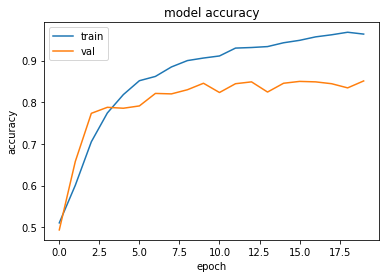

In [ ]:
time.sleep(5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

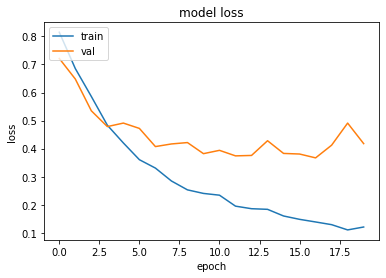

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
a.evaluate(X_test,y_test)